In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype="int")

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
X=df.drop(columns=['Exited'])
y=df["Exited"]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [15]:
X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-02-23 08:02:26.809745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 08:02:26.809934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 08:02:26.961183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
model=Sequential()

#model.add(Dense(3,activation="sigmoid",input_dim=11))
#model.add(Dense(1,activation="sigmoid"))


model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#model.compile(loss='binary_crossentropy',optimizer="Adam")
model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [21]:
#model.fit(X_train_scaled,y_train,epochs=100)
history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.5226 - accuracy: 0.7972 - val_loss: 0.4773 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4561 - accuracy: 0.7991 - val_loss: 0.4398 - val_accuracy: 0.8006
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4262 - accuracy: 0.8134 - val_loss: 0.4194 - val_accuracy: 0.8163
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8214 - val_loss: 0.4080 - val_accuracy: 0.8231
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8288 - val_loss: 0.3989 - val_accuracy: 0.8250
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8298 - val_loss: 0.3901 - val_accuracy: 0.8338
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3864 - accuracy: 0.8361 - val_loss: 0.3819 - val_accuracy: 0.8431
Epoch 

In [22]:
model.layers[0].get_weights()

[array([[-9.13162306e-02,  2.05134988e-01,  3.60441834e-01,
          4.84370321e-01, -2.14959048e-02, -4.56148326e-01,
         -5.21853685e-01,  5.39330542e-02, -1.00909956e-01,
         -1.00452878e-01,  1.09016396e-01],
        [-5.10975778e-01, -1.05874586e+00, -6.63087010e-01,
          4.50088441e-01,  7.13589609e-01, -1.14767127e-01,
         -1.48793414e-01, -2.33101010e-01, -1.08555675e+00,
          2.65828520e-01, -2.79876053e-01],
        [-1.87477753e-01, -1.26781583e-01, -3.32806110e-01,
          4.62849051e-01,  4.44177657e-01, -4.63497818e-01,
         -6.13327026e-02, -1.50065869e-03,  6.12551719e-02,
         -1.14013925e-01, -1.60498871e-03],
        [ 1.03053056e-01, -2.56704450e-01, -6.16280556e-01,
          2.41724099e-03, -2.48662978e-01, -4.45852727e-01,
          5.12295127e-01, -7.90465772e-01,  5.00075631e-02,
          6.53579354e-01,  8.09883997e-02],
        [ 2.15777889e-01, -1.15473509e-01,  3.05197001e-01,
         -7.66894996e-01,  1.45770729e-01, -

In [23]:
model.layers[1].get_weights()

[array([[ 0.23056616, -0.14443354, -0.79060113, -0.5342305 ,  0.02360157,
          0.24728598, -0.5187678 , -0.0391264 ,  0.18692076,  0.4113438 ,
         -0.10798223],
        [ 1.3472699 ,  1.3656913 , -0.87713957, -0.40223786,  0.03836591,
         -0.23523667, -0.09969248,  0.11400922,  0.698751  ,  0.24866363,
         -0.25110212],
        [ 0.35512587,  0.34855247, -0.49222568, -0.25979447, -0.7479515 ,
          0.24719562, -0.21049166, -0.06528524,  0.01111558, -0.12716618,
         -0.4310343 ],
        [-0.6824992 , -0.24973579,  0.23467559, -0.03327402,  0.67702353,
          0.18719238,  0.24500574,  0.76644725, -0.2764949 , -0.43544906,
          0.31001943],
        [ 0.5438707 , -0.11635531, -0.01848119, -0.29394796, -0.1074234 ,
          0.6316612 , -0.48263714, -0.78792286,  0.52388924,  0.75767225,
         -0.6533159 ],
        [-0.601384  , -0.00627598,  0.0914976 ,  0.4942096 ,  0.12589334,
         -0.7402189 , -0.01430417,  0.06357797, -0.34631836, -0.0619529

In [24]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


array([[0.0283744 ],
       [0.1010217 ],
       [0.07759327],
       ...,
       [0.01418314],
       [0.03986765],
       [0.41379395]], dtype=float32)

In [25]:
y_log=model.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)

63/63 [==============================] - 0s 1ms/step


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8635

In [27]:
import matplotlib.pyplot as plt 

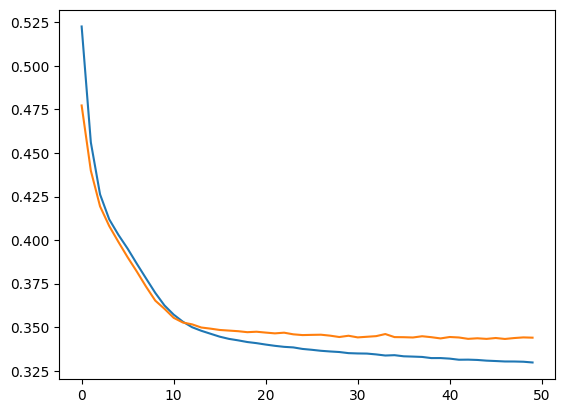

In [30]:
# reduced training error 
#history.history

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

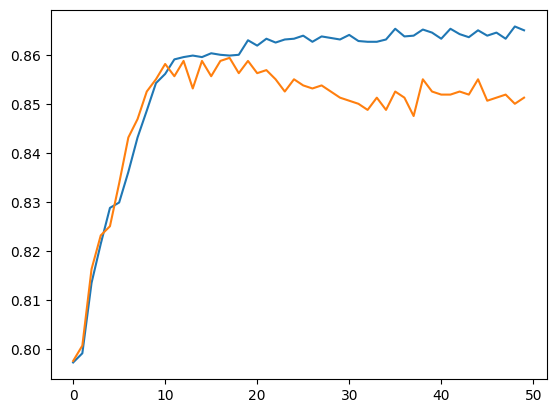

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])